In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df = pd.read_excel("빚추가마지막.xlsx")
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,2,abled,nowork,NaN,city,405.0,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,남성,1,abled,work,942.0,city,2788.0,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,762.0,city,2304.0,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,855.0,city,5231.0,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,4,abled,work,399.0,city,5231.0,21,0.0,0


### 맨 먼저 해야하는 건 다른 변수 들 중 소득 및 빚에 따른 우울감 차이를 볼거기 떄문에 소득과 빚이 있는 사람들로 기준을 잡아서 데이터를 전처리 및 분석할 것임

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13474 entries, 0 to 13473
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13474 non-null  int64  
 1   gen              13474 non-null  object 
 2   age              13474 non-null  int64  
 3   religion         13474 non-null  object 
 4   edu              13474 non-null  object 
 5   sm_year          1119 non-null   float64
 6   sm_state         13474 non-null  object 
 7   sm_day           2036 non-null   float64
 8   dr_mean_year     13474 non-null  object 
 9   dr_6cup          5711 non-null   object 
 10  dr_hurt          5711 non-null   object 
 11  dr_worry         5711 non-null   object 
 12  preg_experience  13474 non-null  object 
 13  health_state     13474 non-null  int64  
 14  disabled         13474 non-null  object 
 15  work_state       13474 non-null  object 
 16  work_code        8058 non-null   float64
 17  region      

In [5]:
#

## 데이터 결측치 홯ㄱ인

In [6]:
df= df.loc[(df['income']>0)&(df['debt']>0),:]
df = df.iloc[:,1:]


In [7]:
df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,nowork,NaN,city,405.0,20,10350.0,0
2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,남성,4,abled,work,762.0,city,2304.0,18,21220.0,0
8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,work,151.0,city,2290.8,21,1020.0,0
9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,nowork,NaN,city,2290.8,17,1020.0,0
13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,전혀,...,남성,4,abled,work,399.0,city,5958.0,20,12921.0,0


## 데이터 확인 
### 연속형 변수들의 데이터 확인 및 전처리

In [8]:
df.describe()

,age,sm_year,sm_day,health_state,work_code,income,y_total,debt,y_train
count,5414.000000,383.000000,1048.000000,5414.000000,3801.000000,5414.000000,5414.000000,5414.000000,5414.000000
mean,51.013668,24.856397,14.953244,3.648134,546.257564,6628.044847,18.580901,10158.879405,0.095308
std,16.726448,14.922584,7.538168,0.861421,270.564329,3995.165853,2.982555,13604.478757,0.293668
min,17.000000,0.000000,1.000000,1.000000,111.000000,1.000000,11.000000,3.000000,0.000000
25%,39.000000,11.500000,10.000000,3.000000,312.000000,3851.500000,17.000000,2096.000000,0.000000
50%,50.000000,25.000000,15.000000,4.000000,510.000000,6113.500000,17.000000,6200.000000,0.000000
75%,63.000000,35.000000,20.000000,4.000000,842.000000,8556.000000,19.000000,13000.000000,0.000000
max,101.000000,68.000000,50.000000,5.000000,1009.000000,65676.000000,38.000000,256400.000000,1.000000


In [9]:
# 연속형 칼럼
#

<Axes: xlabel='sm_day', ylabel='y_total'>

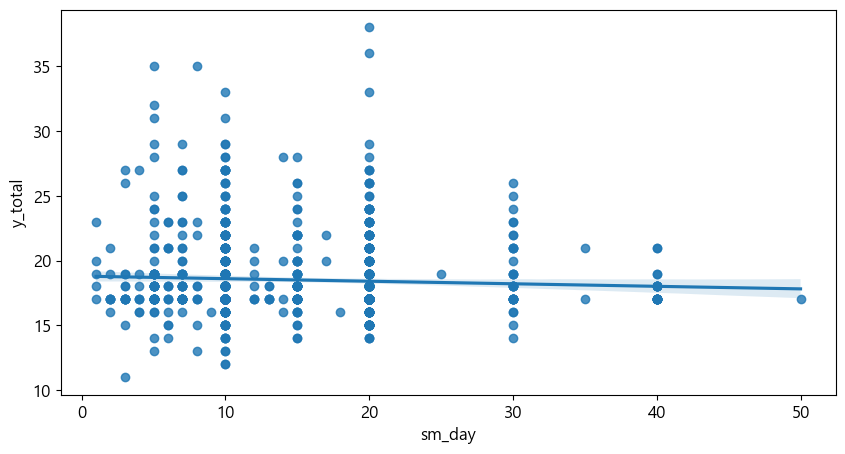

In [10]:
sns.regplot(data=df,x='sm_day',y='y_total')

<Axes: xlabel='sm_year', ylabel='y_total'>

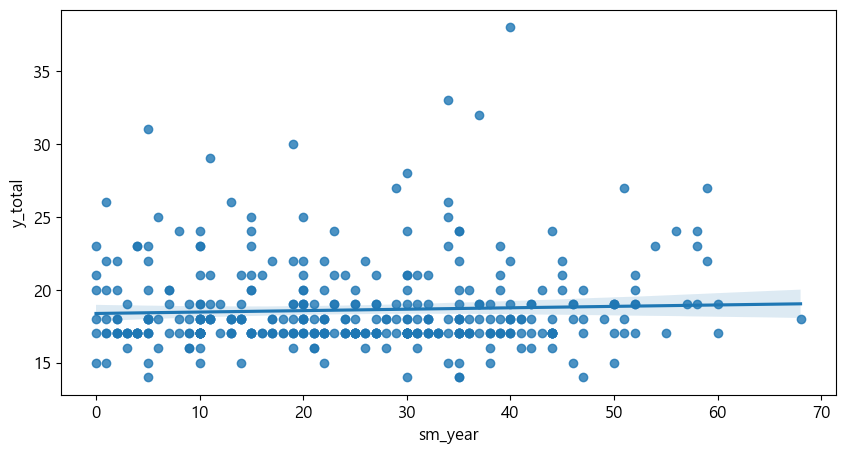

In [11]:
sns.regplot(data=df,x='sm_year',y='y_total')

<Axes: xlabel='income', ylabel='y_total'>

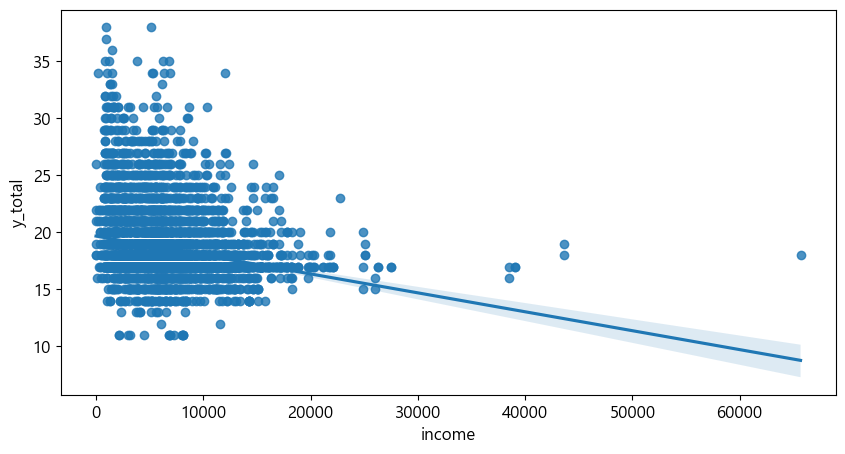

In [12]:
sns.regplot(data=df,x='income',y='y_total')

<Axes: xlabel='debt', ylabel='y_total'>

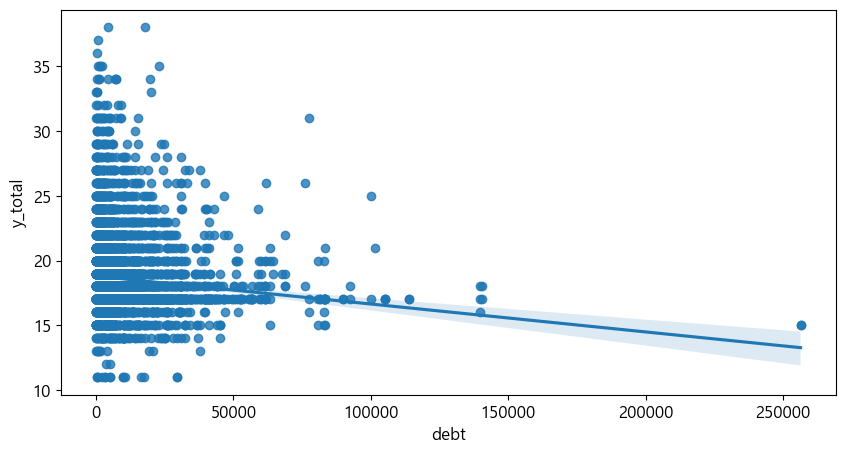

In [13]:
sns.regplot(data=df,x='debt',y='y_total')

In [14]:
## 시각화를 진행 한 결과, income이랑 debt가 상관성이 있어보여서 상관분석 진행함.

In [15]:
corr  = df[['income', 'debt' ,'y_total']].corr()
corr

,income,debt,y_total
income,1.000000,0.300693,-0.222360
debt,0.300693,1.000000,-0.098187
y_total,-0.222360,-0.098187,1.000000


In [16]:
## 근데 income과 debt의 단위는 같지만 기초통계량을 확인해 본 결과 스케일 차이가 나는거 같아서 로그변환 진행

In [17]:
df['income'] = np.log1p(df['income'])
df['debt'] = np.log1p(df['debt'])

df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,nowork,NaN,city,6.006353,20,9.244838,0
2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,남성,4,abled,work,762.0,city,7.742836,18,9.962747,0
8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,work,151.0,city,7.737093,21,6.928538,0
9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,nowork,NaN,city,7.737093,17,6.928538,0
13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,전혀,...,남성,4,abled,work,399.0,city,8.692658,20,9.466687,0


#### 연속형 변수의 데이터 분포 확인

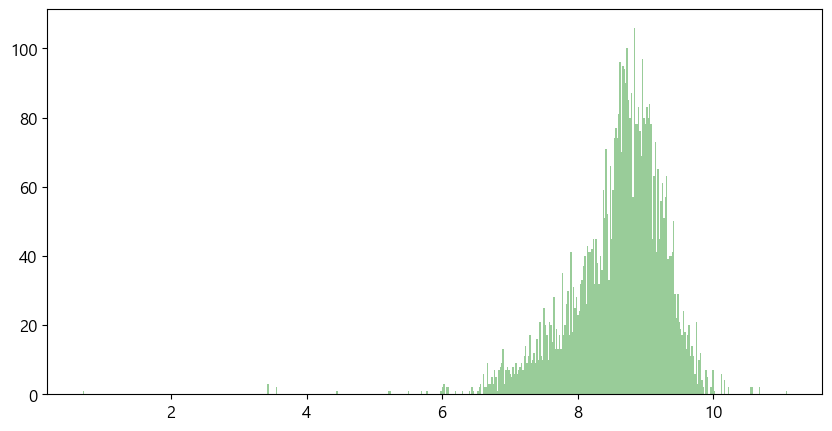

In [18]:
plt.hist(df['income'], color = 'green', alpha = 0.4, bins = 500)
plt.show()

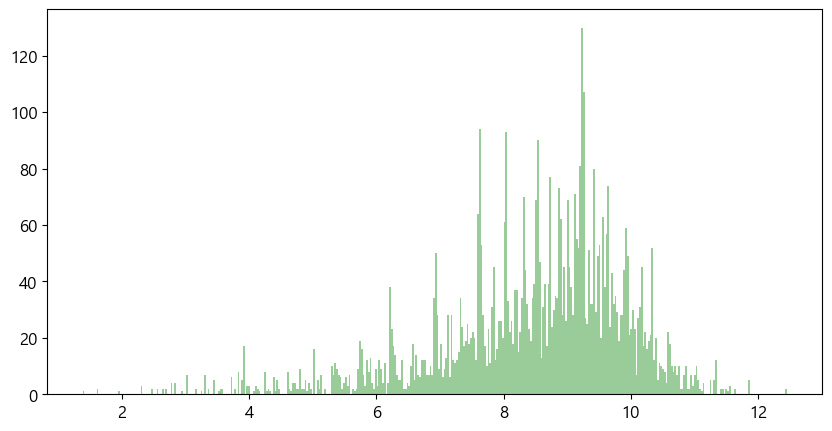

In [19]:
plt.hist(df['debt'], color = 'green', alpha = 0.4, bins = 400)
plt.show()

## 명목형 변수의 데이터 확인 및 전처리

### 나이변수의 범주화 - > 파생변수 추가

In [20]:
bins = [20,29,39,49,59,99]
labels = ['19~29세','30~39세','40~49세','50~59세','60세 이상']

cuts = pd.cut(df['age'],bins,labels=labels)
df['age_range'] = cuts
df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,2,abled,nowork,NaN,city,6.006353,20,9.244838,0,60세 이상
2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,4,abled,work,762.0,city,7.742836,18,9.962747,0,60세 이상
8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,2,abled,work,151.0,city,7.737093,21,6.928538,0,50~59세
9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,2,abled,nowork,NaN,city,7.737093,17,6.928538,0,30~39세
13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,전혀,...,4,abled,work,399.0,city,8.692658,20,9.466687,0,40~49세


In [21]:
df.drop('age',axis=1,inplace=True)
df.head()

,gen,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,dr_worry,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,female,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,nowork,NaN,city,6.006353,20,9.244838,0,60세 이상
2,male,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,4,abled,work,762.0,city,7.742836,18,9.962747,0,60세 이상
8,female,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,work,151.0,city,7.737093,21,6.928538,0,50~59세
9,female,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,nowork,NaN,city,7.737093,17,6.928538,0,30~39세
13,male,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,전혀,전혀,...,4,abled,work,399.0,city,8.692658,20,9.466687,0,40~49세


In [22]:
### 건강만족도 ㄱㄱ 

ctype = pd.CategoricalDtype(categories=[1,2,3,4,5], ordered=True)

df['health_state'] = df['health_state'].astype(ctype)

df['health_state'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)

In [23]:
df.columns

Index(['gen', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'debt', 'y_train', 'age_range'],
      dtype='object')

In [24]:
## 명목형 변수 
## gen religion edu sm_state dr_mean_year dr_6cup dr_hurt dr_worry preg_experience health_state disabled work_state income age_range


## 명목형 변수의 빈도수 확인

In [25]:
cnames = ['gen' ,'religion' ,'edu' ,'sm_state' ,'dr_mean_year','dr_6cup' ,'dr_hurt' ,'dr_worry' ,'preg_experience', 'health_state','disabled', 'work_state','age_range']

In [26]:
df['age_range'].value_counts()

age_range
60세 이상    1729
40~49세    1176
50~59세    1086
30~39세     758
19~29세     656
Name: count, dtype: int64

In [27]:
df['gen'].value_counts()

gen
female    2887
male      2527
Name: count, dtype: int64

In [28]:
df['religion'].value_counts()

religion
no     3015
yes    2399
Name: count, dtype: int64

In [29]:
df['edu'].value_counts()

edu
대졸이상    2686
고졸      1690
초졸이하     607
중졸       431
Name: count, dtype: int64

In [30]:
df['sm_state'].value_counts()

sm_state
no     4366
yes    1048
Name: count, dtype: int64

In [31]:
df['dr_mean_year'].value_counts()

dr_mean_year
전혀마시지않음    2459
월2~3회      1127
주2~3회       807
월1회         662
주4회이상       359
Name: count, dtype: int64

In [32]:
df['dr_6cup'].value_counts()

dr_6cup
전혀     1052
월1회     607
주1회     568
연1회     546
매일      182
Name: count, dtype: int64

In [33]:
df['dr_hurt'].value_counts()

dr_hurt
전혀      2881
과거존재      61
최근존재      13
Name: count, dtype: int64

In [34]:
df['dr_worry'].value_counts()

dr_worry
전혀      2650
최근존재     214
과거존재      91
Name: count, dtype: int64

In [35]:
df['preg_experience'].value_counts()


preg_experience
없다    2830
남성    2527
있다      57
Name: count, dtype: int64

In [36]:
df['health_state'].value_counts()


health_state
4    3150
3     995
2     645
5     563
1      61
Name: count, dtype: int64

In [37]:
df['disabled'].value_counts()


disabled
abled       5096
disabled     318
Name: count, dtype: int64

In [38]:
df['work_state'].value_counts()


work_state
work      3801
nowork    1613
Name: count, dtype: int64

In [39]:
df['age_range'].value_counts()


age_range
60세 이상    1729
40~49세    1176
50~59세    1086
30~39세     758
19~29세     656
Name: count, dtype: int64

In [40]:
cnames

['gen',
 'religion',
 'edu',
 'sm_state',
 'dr_mean_year',
 'dr_6cup',
 'dr_hurt',
 'dr_worry',
 'preg_experience',
 'health_state',
 'disabled',
 'work_state',
 'age_range']

## 데이터의 분포 확인  :  명목형 변수들의 y_train에 따른 차이 확인

### 전체적인 경향성은 나이가 많아질수록 우울감이 높게 나타난다. 특히 노년층의 우울감은 굉장히 높다

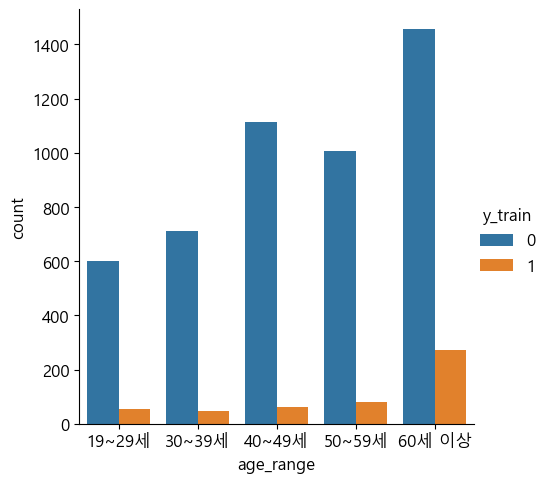

In [41]:
sns.catplot(data=df,x='age_range',kind='count',hue='y_train')

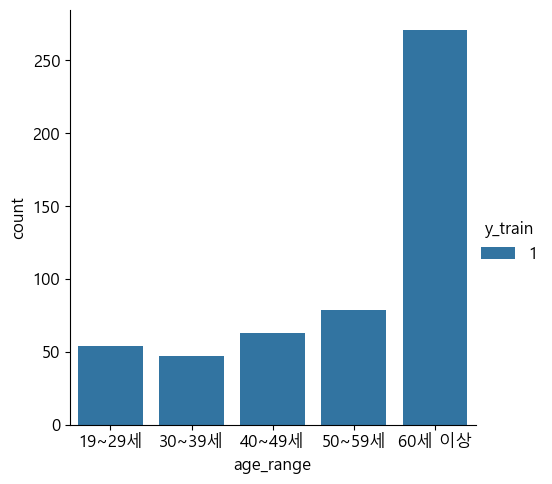

In [42]:
sns.catplot(data=df.loc[df['y_train']==1],x='age_range',kind='count',hue='y_train')

종교에 따른 우울감 경험여부는 차이가 없는것으로 보임

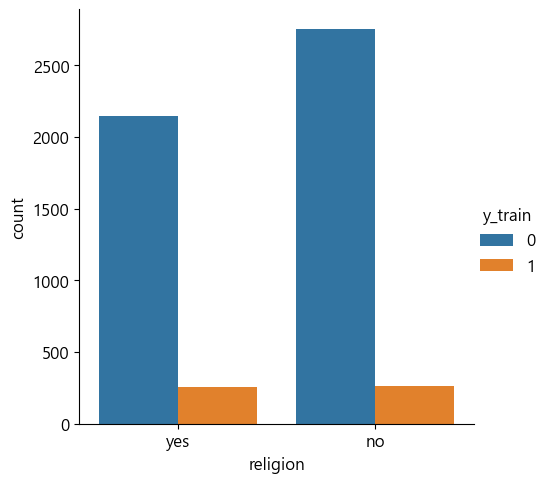

In [43]:
sns.catplot(data=df,x='religion',kind='count',hue='y_train')

교육수준에 따른 우울감 경험여부의 비율은 초졸인 사람들이 가장높았음.

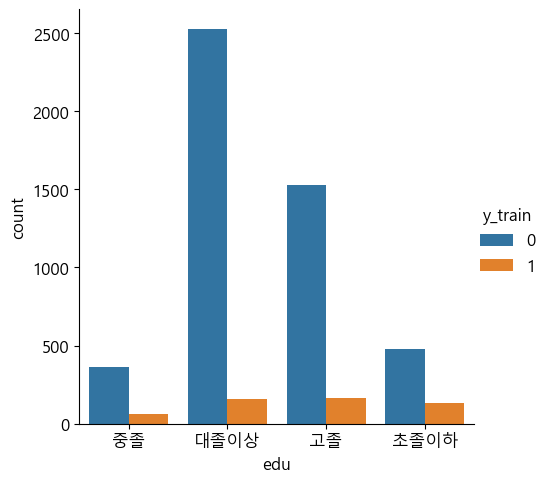

In [44]:
sns.catplot(data=df,x='edu',kind='count',hue='y_train')
plt.show()
plt.close()

흡연여부는 애매함. -> 다운샘플링 진행

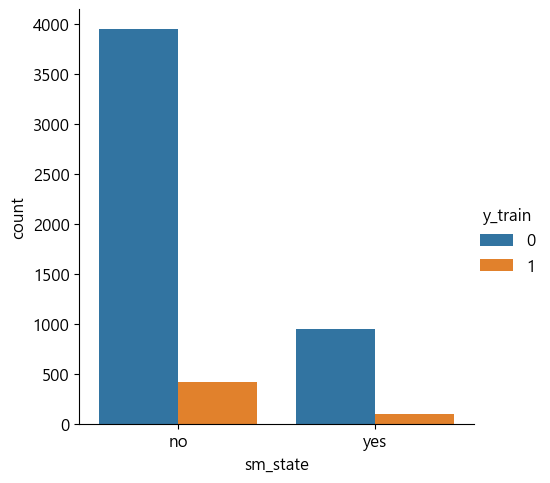

In [45]:
sns.catplot(data=df,x='sm_state',kind='count',hue='y_train')

In [46]:
from sklearn.utils import resample

subset_city_downsampled = resample(df[df['sm_state']=='no'],
                            replace=False,
                            n_samples =1048 ,
                            random_state = 2020)
                            


In [47]:
df.columns

Index(['gen', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'debt', 'y_train', 'age_range'],
      dtype='object')

### 흡연 기간에 따른 우울감 점수 차이 없음


In [48]:
df.head()

,gen,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,dr_worry,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,female,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,nowork,NaN,city,6.006353,20,9.244838,0,60세 이상
2,male,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,4,abled,work,762.0,city,7.742836,18,9.962747,0,60세 이상
8,female,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,work,151.0,city,7.737093,21,6.928538,0,50~59세
9,female,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,nowork,NaN,city,7.737093,17,6.928538,0,30~39세
13,male,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,전혀,전혀,...,4,abled,work,399.0,city,8.692658,20,9.466687,0,40~49세


In [49]:
sm_data = pd.concat([df[df['sm_state']=='yes'],subset_city_downsampled])
sm_data['sm_state'].value_counts()

sm_state
yes    1048
no     1048
Name: count, dtype: int64

별차이 없음>


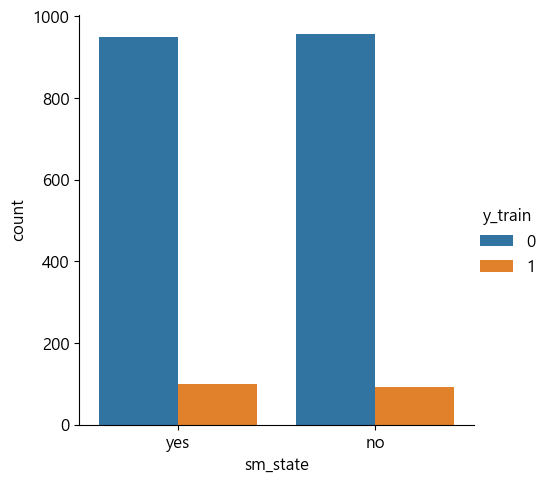

In [50]:
sns.catplot(data=sm_data,x='sm_state',kind='count',hue='y_train')

연평균 음주량도 별 차이 없어보임.

In [51]:
df['dr_mean_year'].unique()

array(['전혀마시지않음', '월2~3회', '월1회', '주2~3회', '주4회이상'], dtype=object)

In [52]:
from sklearn.utils import resample

subset_drink_none = resample(df[df['dr_mean_year']=='전혀마시지않음'],
                            replace=False,
                            n_samples =359 ,
                            random_state = 2020)

subset_drink_two = resample(df[df['dr_mean_year']=='월2~3회'],
                            replace=False,
                            n_samples =359 ,
                            random_state = 2020)

subset_drink_one = resample(df[df['dr_mean_year']=='월1회'],
                            replace=False,
                            n_samples =359 ,
                            random_state = 2020)

subset_drink_week = resample(df[df['dr_mean_year']=='주2~3회'],
                            replace=False,
                            n_samples =359 ,
                            random_state = 2020)



In [53]:
dr_data = pd.concat([df[df['dr_mean_year']=='주4회이상'],subset_drink_none,subset_drink_two,subset_drink_one,subset_drink_week])
dr_data['dr_mean_year'].value_counts()

dr_mean_year
주4회이상      359
전혀마시지않음    359
월2~3회      359
월1회        359
주2~3회      359
Name: count, dtype: int64

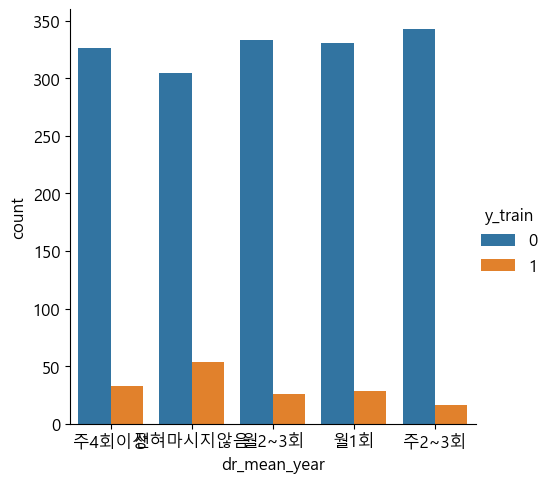

In [54]:
sns.catplot(data=dr_data,x='dr_mean_year',kind='count',hue='y_train')

In [55]:
df['dr_6cup'].unique()

over_dr = df.loc[df['dr_6cup'].notnull(),:]

over_dr['dr_6cup'].isnull().sum()

over_dr['dr_6cup'].value_counts()

dr_6cup
전혀     1052
월1회     607
주1회     568
연1회     546
매일      182
Name: count, dtype: int64

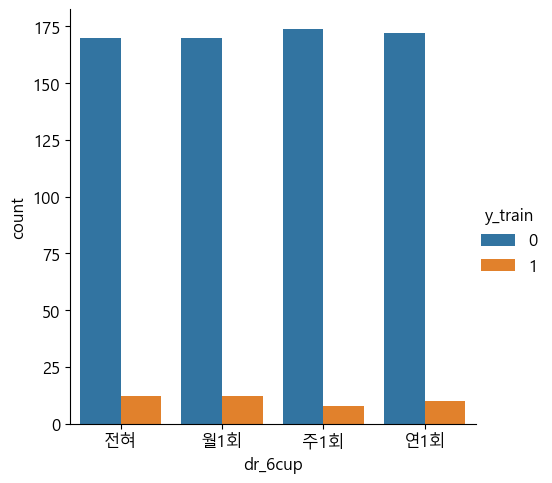

In [56]:

subset_6drink_none = resample(df[df['dr_6cup']=='전혀'],
                            replace=False,
                            n_samples =182 ,
                            random_state = 2020)

subset_6drink_month = resample(df[df['dr_6cup']=='월1회'],
                            replace=False,
                            n_samples =182 ,
                            random_state = 2020)

subset_6drink_week = resample(df[df['dr_6cup']=='주1회'],
                            replace=False,
                            n_samples =182 ,
                            random_state = 2020)

subset_6drink_day = resample(df[df['dr_6cup']=='연1회'],
                            replace=False,
                            n_samples =182 ,
                            random_state = 2020)


dr_6cup_data = pd.concat([df[df['dr_mean_year']=='매일'],subset_6drink_none,subset_6drink_month,subset_6drink_week,subset_6drink_day])
dr_6cup_data['dr_6cup'].value_counts()


sns.catplot(data=dr_6cup_data,x='dr_6cup',kind='count',hue='y_train')

술을 한번마실때 6잔 이상 마시는 사람들이 우울감을 느끼는가에 대한 가설은 의미 x

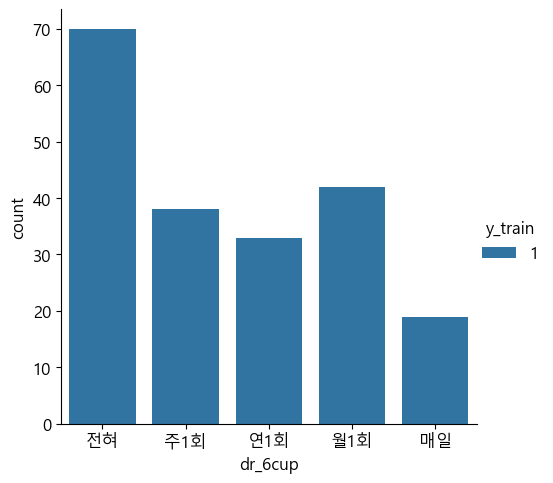

In [57]:
sns.catplot(data=over_dr.loc[over_dr['y_train']==1],x='dr_6cup',kind='count',hue='y_train')

임신경험 여부는 별 차이 없음

In [58]:
woman = df.loc[df['preg_experience']!='남성']
woman['preg_experience'].value_counts()

preg_experience
없다    2830
있다      57
Name: count, dtype: int64

In [59]:

subset_city_downsampled = resample(woman[woman['preg_experience']=='없다'],
                            replace=False,
                            n_samples =57 ,
                            random_state = 2020)

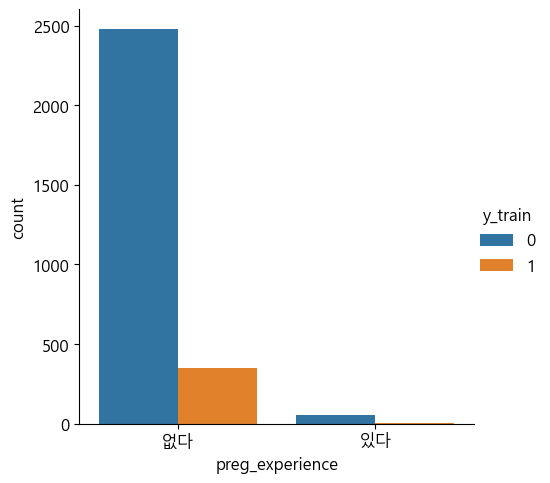

In [60]:

sns.catplot(data=woman,x='preg_experience',kind='count',hue='y_train')

In [61]:
sm_data = pd.concat([woman[woman['preg_experience']=='있다'],subset_city_downsampled])
sm_data['preg_experience'].value_counts()

preg_experience
있다    57
없다    57
Name: count, dtype: int64

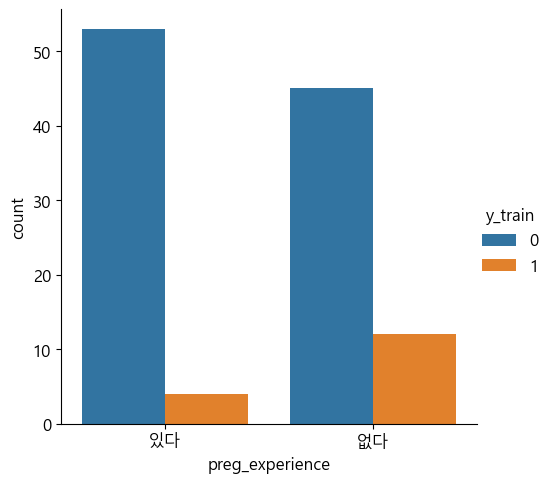

In [62]:
sns.catplot(data=sm_data,x='preg_experience',kind='count',hue='y_train')

In [63]:
df['health_state'].value_counts()

health_state
4    3150
3     995
2     645
5     563
1      61
Name: count, dtype: int64

건강 만족도가 높아지면 우울감을 경험하는 경우가 적다.

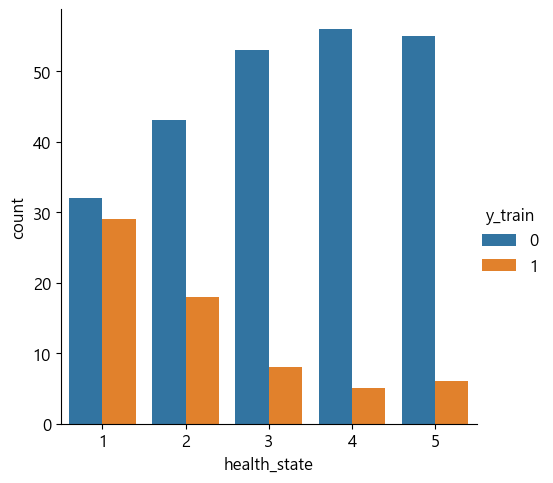

In [64]:


subset_health_2 = resample(df[df['health_state']==2],
                            replace=False,
                            n_samples =61 ,
                            random_state = 2020)

subset_health_3 = resample(df[df['health_state']==3],
                            replace=False,
                            n_samples =61 ,
                            random_state = 2020)

subset_health_4 = resample(df[df['health_state']==4],
                            replace=False,
                            n_samples =61 ,
                            random_state = 2020)

subset_health_5 = resample(df[df['health_state']==5],
                            replace=False,
                            n_samples =61 ,
                            random_state = 2020)


health_data = pd.concat([df[df['health_state']==1],subset_health_2,subset_health_3,subset_health_4,subset_health_5])
health_data['health_state'].value_counts()


sns.catplot(data=health_data,x='health_state',kind='count',hue='y_train')

,health_state,y_total
health_state,1.000000,-0.342151
y_total,-0.342151,1.000000


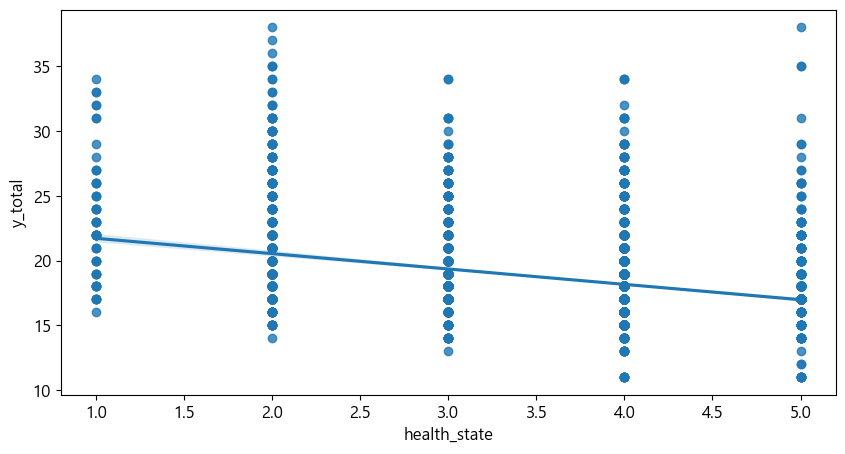

In [65]:
sns.regplot(data=df,x='health_state',y='y_total')
corr = df[['health_state','y_total']].corr(method='pearson')
corr

장애여부는 데이터의 크기 차이가 심해서 비교하기 애매함 -> 다운샘플링

In [66]:
df['disabled'].value_counts()

disabled
abled       5096
disabled     318
Name: count, dtype: int64

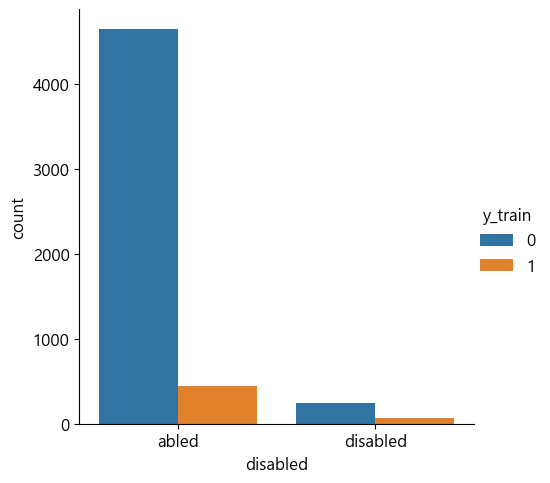

In [67]:
sns.catplot(data=df,x='disabled',kind='count',hue='y_train')

In [68]:
subset_city_downsampled = resample(df[df['disabled']=='abled'],
                            replace=False,
                            n_samples =319 ,
                            random_state = 2020)
able = pd.concat([df[df['disabled']=='disabled'],subset_city_downsampled])
able['disabled'].value_counts()

disabled
abled       319
disabled    318
Name: count, dtype: int64

차이 있음

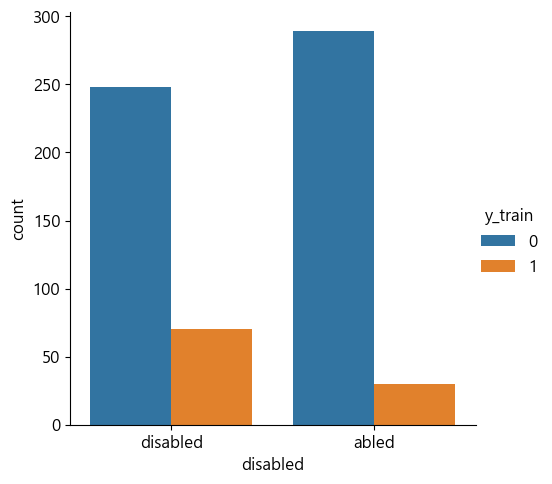

In [69]:
sns.catplot(data=able,x='disabled',kind='count',hue='y_train')

In [70]:
df['work_state'].unique()

array(['nowork', 'work'], dtype=object)

In [71]:
df['work_state'].value_counts()

work_state
work      3801
nowork    1613
Name: count, dtype: int64

노동여부에 따라 차이 많이 남

In [72]:
df['work_state'].unique()

array(['nowork', 'work'], dtype=object)

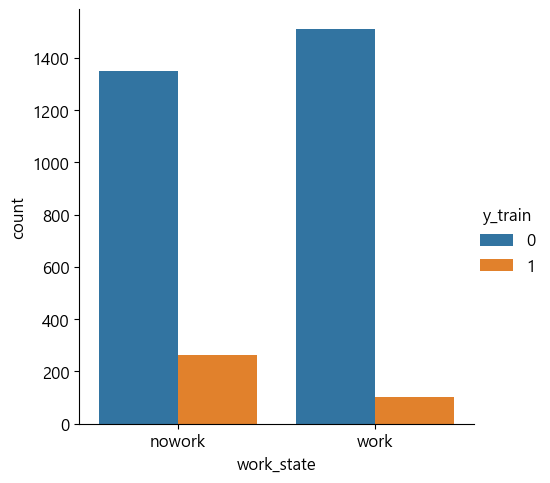

In [73]:
subset_work_downsampled = resample(df[df['work_state']=='work'],
                            replace=False,
                            n_samples =1613 ,
                            random_state = 2020)
workd_data = pd.concat([df[df['work_state']=='nowork'],subset_work_downsampled])
# workd_data['work_state'].value_counts()
sns.catplot(data=workd_data,x='work_state',kind='count',hue='y_train')

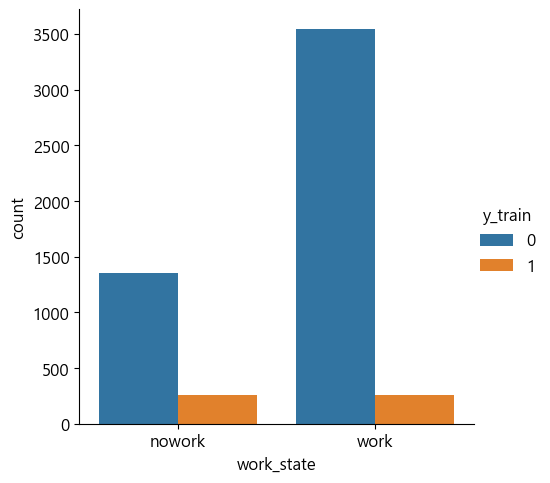

In [74]:
sns.catplot(data=df,x='work_state',kind='count',hue='y_train')

사는 지역에 따라 우울감 경험의차이는 없ㅇ므

In [75]:
df['region'].value_counts()

region
city       4718
country     696
Name: count, dtype: int64

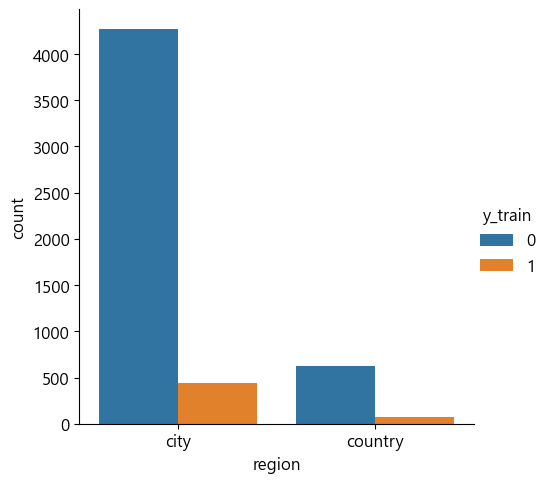

In [76]:
sns.catplot(data=df,x='region',kind='count',hue='y_train')

In [77]:

subset_city_downsampled = resample(df[df['region']=='city'],
                            replace=False,
                            n_samples =696 ,
                            random_state = 2020)
city = pd.concat([df[df['region']=='country'],subset_city_downsampled])
city['region'].value_counts()

region
country    696
city       696
Name: count, dtype: int64

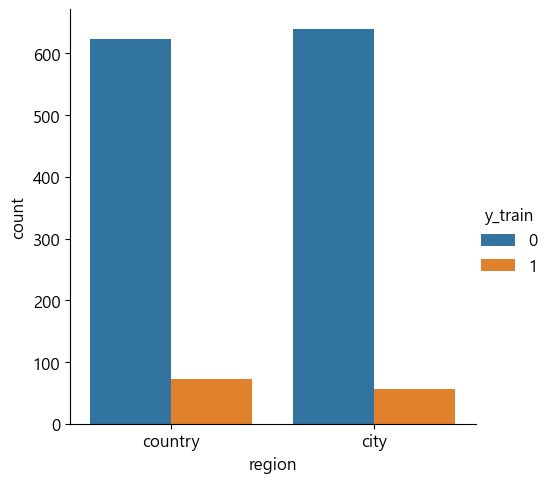

In [78]:
sns.catplot(data=city,x='region',kind='count',hue='y_train')

성별에 따른 차이 잇음

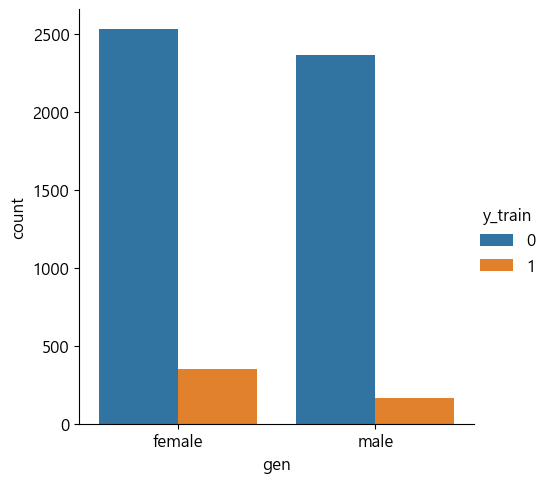

In [79]:
sns.catplot(data=df,x='gen',kind='count',hue='y_train')

In [80]:
df.head()

,gen,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,dr_worry,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,female,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,nowork,NaN,city,6.006353,20,9.244838,0,60세 이상
2,male,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,4,abled,work,762.0,city,7.742836,18,9.962747,0,60세 이상
8,female,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,work,151.0,city,7.737093,21,6.928538,0,50~59세
9,female,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,nowork,NaN,city,7.737093,17,6.928538,0,30~39세
13,male,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,전혀,전혀,...,4,abled,work,399.0,city,8.692658,20,9.466687,0,40~49세


In [81]:
df.columns

Index(['gen', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'debt', 'y_train', 'age_range'],
      dtype='object')

## 변수 골라내기 

In [82]:
df = df.loc[:,['gen','edu','health_state','disabled','work_state','income','y_total','debt','y_train','age_range']]
df.head()

,gen,edu,health_state,disabled,work_state,income,y_total,debt,y_train,age_range
0,female,중졸,2,abled,nowork,6.006353,20,9.244838,0,60세 이상
2,male,대졸이상,4,abled,work,7.742836,18,9.962747,0,60세 이상
8,female,고졸,2,abled,work,7.737093,21,6.928538,0,50~59세
9,female,중졸,2,abled,nowork,7.737093,17,6.928538,0,30~39세
13,male,대졸이상,4,abled,work,8.692658,20,9.466687,0,40~49세


## 변수들의 카테고리화 과정

In [83]:
df['age_range']= df['age_range'].astype('str')
df['age_range'] = df['age_range'].fillna(0)
df = df.loc[df['age_range']!=0,:]

df['age_range'].unique()

array(['60세 이상', '50~59세', '30~39세', '40~49세', '19~29세', 'nan'],
      dtype=object)

In [84]:
df.head()

,gen,edu,health_state,disabled,work_state,income,y_total,debt,y_train,age_range
0,female,중졸,2,abled,nowork,6.006353,20,9.244838,0,60세 이상
2,male,대졸이상,4,abled,work,7.742836,18,9.962747,0,60세 이상
8,female,고졸,2,abled,work,7.737093,21,6.928538,0,50~59세
9,female,중졸,2,abled,nowork,7.737093,17,6.928538,0,30~39세
13,male,대졸이상,4,abled,work,8.692658,20,9.466687,0,40~49세


In [85]:
# df=df.loc[:,['gen','edu','health_state','disabled','work_state','y_train','age_range','log_income','log_debt']]
# df.head()

In [86]:
df.loc[df['gen']=='male','gen']=1
df.loc[df['gen']=='female','gen']=2
df['gen'] = df['gen'].astype('category')

df.loc[df['edu']=='초졸이하','edu']=1
df.loc[df['edu']=='중졸','edu']=2
df.loc[df['edu']=='고졸','edu']=3
df.loc[df['edu']=='대졸이상','edu']=4
df['edu'] = df['edu'].astype('category')

df.loc[df['disabled']=='disabled','disabled']=1
df.loc[df['disabled']=='abled','disabled']=2
df['disabled'] = df['disabled'].astype('category')


df.loc[df['work_state']=='work','work_state']=1
df.loc[df['work_state']=='nowork','work_state']=2
df['work_state'] = df['work_state'].astype('category')

df['age_range'] = df['age_range'].astype('str')
df.loc[df['age_range']=='19~29세','age_range']=1
df.loc[df['age_range']=='30~39세','age_range']=2
df.loc[df['age_range']=='40~49세','age_range']=3
df.loc[df['age_range']=='50~59세','age_range']=4
df.loc[df['age_range']=='60세 이상','age_range']=5
df['age_range'] = df['age_range'].astype('category')


# df= pd.get_dummies(test,drop_first=True,dtype='int')
# df.columns

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 13473
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gen           5414 non-null   category
 1   edu           5414 non-null   category
 2   health_state  5414 non-null   category
 3   disabled      5414 non-null   category
 4   work_state    5414 non-null   category
 5   income        5414 non-null   float64 
 6   y_total       5414 non-null   int64   
 7   debt          5414 non-null   float64 
 8   y_train       5414 non-null   int64   
 9   age_range     5414 non-null   category
dtypes: category(6), float64(2), int64(2)
memory usage: 244.2 KB


In [88]:
df['health_state'].unique()

[2, 4, 3, 5, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [89]:
from scipy.stats import spearmanr

In [91]:
stats.spearmanr(speamanr['health_state'],speamanr['y_total'])



NameError: name 'speamanr' is not defined

## 가설 검정 - 연속형 변수
### 정규성 검정

In [92]:
stats.normaltest(df['income'])

NormaltestResult(statistic=1747.4194887987817, pvalue=0.0)

In [93]:
stats.normaltest(df['debt'])
## 성립 x 

NormaltestResult(statistic=902.8790811642938, pvalue=8.755856035202143e-197)

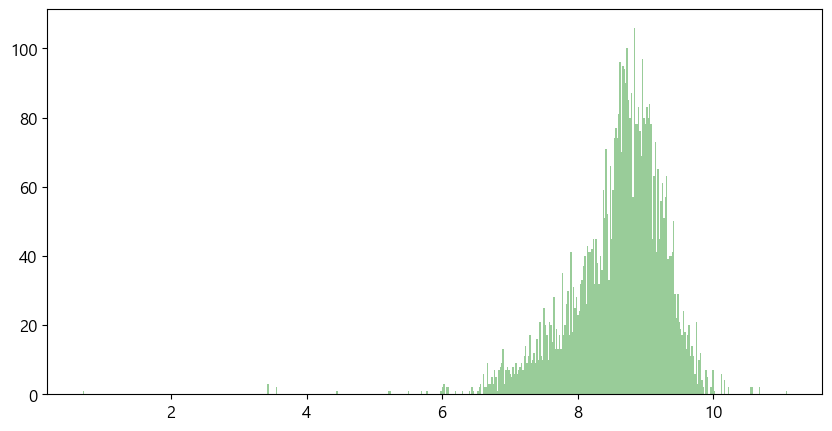

In [94]:
plt.hist(df['income'], color = 'green', alpha = 0.4, bins = 500)
plt.show()


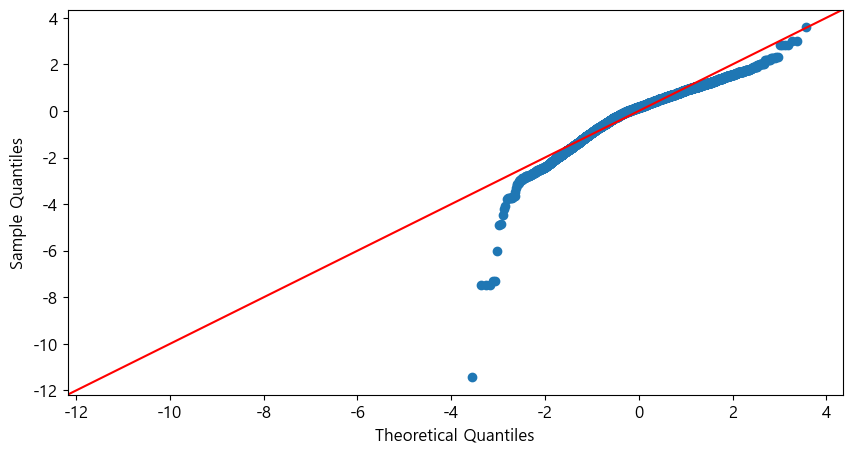

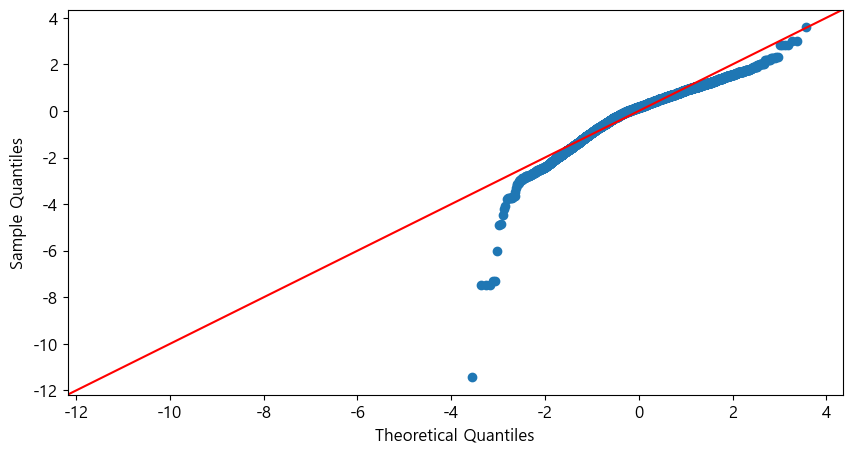

In [95]:
sm.qqplot(df['income'], line='45', fit = True)

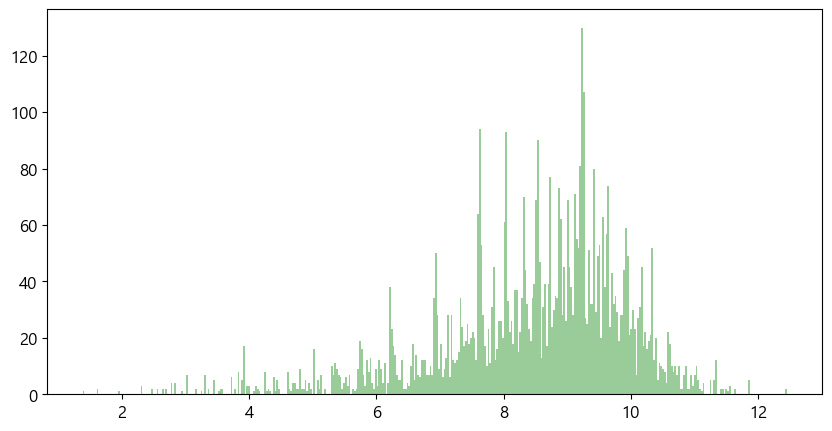

In [96]:
plt.hist(df['debt'], color = 'green', alpha = 0.4, bins = 400)
plt.show()

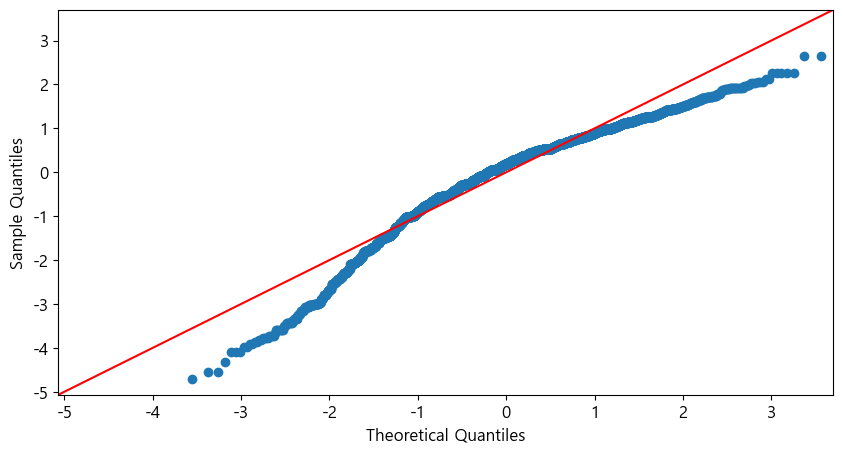

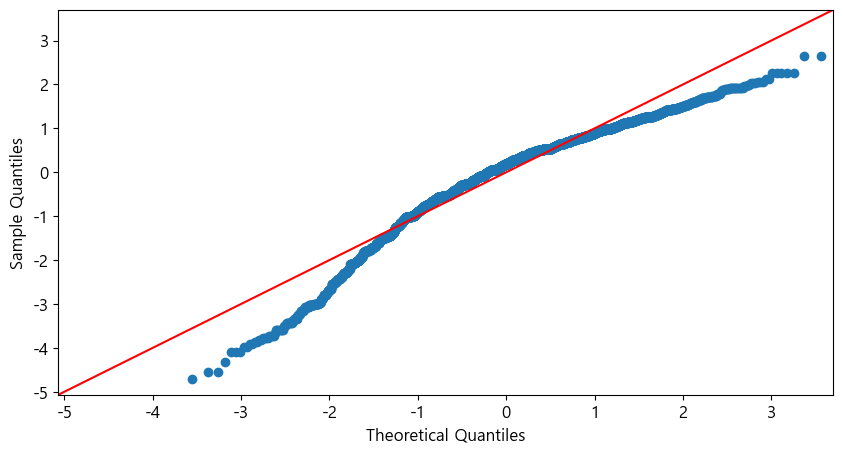

In [97]:
sm.qqplot(df['debt'], line='45', fit = True)

#### 정규성 검정 결과는 p값이 0에 가까우나 표본의 수가 크다는 점과, 히스토그램 및 qq플롯 시각화 결과 어느정도의 정규성을 띄는걸로 확인했기떄문에 정규성을 가정하고 분석을 진행

### 등분산성 
#### 우울감을 느끼는 집단과 안느끼는 집단의 분산이 같은지 검정

In [98]:
data=pd.read_excel("빚추가마지막.xlsx")

In [99]:
train = data.loc[(data['income']>27),:]
train['income'] = np.log1p(train['income'])

C:\Users\hamin\AppData\Local\Temp\ipykernel_7068\2571767070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['income'] = np.log1p(train['income'])


In [100]:
train.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,2,abled,nowork,NaN,city,6.006353,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,남성,1,abled,work,942.0,city,7.933438,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,762.0,city,7.742836,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,855.0,city,8.562549,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,4,abled,work,399.0,city,8.562549,21,0.0,0


In [101]:
y_income_0 = train.loc[train['y_train']==0,'income']
y_income_1 = train.loc[train['y_train']==1,'income']


In [102]:
stats.levene(y_income_1,y_income_0)

LeveneResult(statistic=0.023232134473999987, pvalue=0.8788572576668049)

In [103]:
y_train_debt_0 = df.loc[df['y_train']==0,'debt']
y_train_debt_1 = df.loc[df['y_train']==1,'debt']

In [104]:
stats.levene(y_train_debt_1,y_train_debt_0)

LeveneResult(statistic=3.6671032100108305, pvalue=0.05554921572874413)

## 명목형 변수의 검정 - 카이제곱 검정 

In [105]:
df.columns

Index(['gen', 'edu', 'health_state', 'disabled', 'work_state', 'income',
       'y_total', 'debt', 'y_train', 'age_range'],
      dtype='object')

In [106]:
from scipy.stats import chi2_contingency
result_gen = pd.crosstab(df['gen'],df['y_train'])
chiresult_gen = chi2_contingency(observed=result_gen)
chiresult_gen

Chi2ContingencyResult(statistic=52.82640062154608, pvalue=3.643704777736139e-13, dof=1, expected_freq=array([[2286.15552272,  240.84447728],
       [2611.84447728,  275.15552272]]))

In [107]:
result_edu = pd.crosstab(df['edu'],df['y_train'])
chiresult_edu = chi2_contingency(observed=result_edu)
chiresult_edu

Chi2ContingencyResult(statistic=159.10232692000645, pvalue=2.8631980008510046e-34, dof=3, expected_freq=array([[ 549.14776505,   57.85223495],
       [ 389.92205393,   41.07794607],
       [1528.92870336,  161.07129664],
       [2430.00147765,  255.99852235]]))

In [108]:
result_health_state = pd.crosstab(df['health_state'],df['y_train'])
chiresult_health_state = chi2_contingency(observed=result_health_state)
chiresult_health_state

Chi2ContingencyResult(statistic=447.5737358381009, pvalue=1.4533461899751813e-95, dof=4, expected_freq=array([[  55.18618397,    5.81381603],
       [ 583.52604359,   61.47395641],
       [ 900.16808275,   94.83191725],
       [2849.77835242,  300.22164758],
       [ 509.34133727,   53.65866273]]))

In [109]:
result_disabled = pd.crosstab(df['disabled'],df['y_train'])
chiresult_disabled = chi2_contingency(observed=result_disabled)
chiresult_disabled

Chi2ContingencyResult(statistic=59.51447238967723, pvalue=1.2139806889961367e-14, dof=1, expected_freq=array([[ 287.69190986,   30.30809014],
       [4610.30809014,  485.69190986]]))

In [110]:
result_work_state = pd.crosstab(df['work_state'],df['y_train'])
chiresult_work_state = chi2_contingency(observed=result_work_state)
chiresult_work_state

Chi2ContingencyResult(statistic=118.9403703663307, pvalue=1.0792561563352741e-27, dof=1, expected_freq=array([[3438.73254525,  362.26745475],
       [1459.26745475,  153.73254525]]))

In [111]:
df.head()

,gen,edu,health_state,disabled,work_state,income,y_total,debt,y_train,age_range
0,2,2,2,2,2,6.006353,20,9.244838,0,5
2,1,4,4,2,1,7.742836,18,9.962747,0,5
8,2,3,2,2,1,7.737093,21,6.928538,0,4
9,2,2,2,2,2,7.737093,17,6.928538,0,2
13,1,4,4,2,1,8.692658,20,9.466687,0,3


In [112]:
df = df.drop('y_total',axis=1)


In [113]:
y_data = df['y_train']
new_df = df.drop('y_train',axis=1)
new_df = pd.get_dummies(new_df,drop_first=True,dtype='int')
new_df.head()

,income,debt,gen_2,edu_2,edu_3,edu_4,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5,age_range_nan
0,6.006353,9.244838,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,7.742836,9.962747,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
8,7.737093,6.928538,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
9,7.737093,6.928538,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0
13,8.692658,9.466687,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0


In [114]:
y_data= pd.DataFrame(y_data,columns=['y_train'])

In [115]:
new_df = new_df.drop('age_range_nan',axis=1)
new_df['y_train'] = y_data['y_train']

In [116]:
new_df.head()

,income,debt,gen_2,edu_2,edu_3,edu_4,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5,y_train
0,6.006353,9.244838,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,7.742836,9.962747,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
8,7.737093,6.928538,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
9,7.737093,6.928538,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0
13,8.692658,9.466687,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0


In [117]:
x_col = new_df.columns
x_col = x_col[:-1]
x_col

Index(['income', 'debt', 'gen_2', 'edu_2', 'edu_3', 'edu_4', 'health_state_2',
       'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2',
       'work_state_2', 'age_range_2', 'age_range_3', 'age_range_4',
       'age_range_5'],
      dtype='object')

In [118]:
from scipy.stats import stats
from statsmodels.formula.api import logit
from sklearn.linear_model import  LogisticRegression


c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


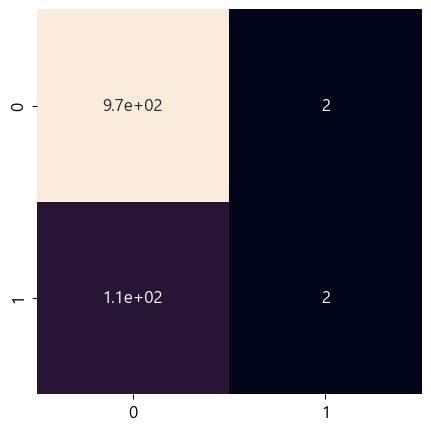

In [119]:

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,  cbar=False, square=True)
# cbar를 통해 colorbar의 유무를 정해 줄 수 있고
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin = 200, vmax=500
plt.show()

In [120]:
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

Accuracy:0.9003
Precision:0.5000
recall:0.0185
F1:0.0357
roc_auc:0.5082


In [123]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(new_df[x_col], new_df['y_train'], 
                                            test_size=0.2, shuffle=True, random_state=20)

y_tr = pd.DataFrame(y_tr,columns=['y_train'])

x_tr['y_train']= y_tr['y_train']

model = logit('y_train ~ x_tr[x_col]',data=x_tr)
fit = model.fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.268461
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_train   No. Observations:                 4331
Model:                          Logit   Df Residuals:                     4314
Method:                           MLE   Df Model:                           16
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                  0.1400
Time:                        10:16:32   Log-Likelihood:                -1162.7
converged:                       True   LL-Null:                       -1352.0
Covariance Type:            nonrobust   LLR p-value:                 1.149e-70
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.6405      0.747      4.875      0.000       2.177       5.104
x_tr[x_col][0]     -0.4293      0.076     -5.655      0.000      -0.578      -0.281
x_tr[x_col][1]     -0.0424      0.038     -1.121      0.262      -0.116       0.032
x_tr[x_col][2]      0.6098      0.122      5.012      0.000       0.371       0.848
x_tr[x_col][3]     -0.0653      0.199     -0.328      0.743      -0.456       0.325
x_tr[x_col][4]     -0.0352      0.181     -0.194      0.846      -0.390       0.320
x_tr[x_col][5]     -0.4479      0.214     -2.090      0.037      -0.868      -0.028
x_tr[x_col][6]     -0.7268      0.313     -2.320      0.020      -1.341      -0.113
x_tr[x_col][7]     -1.4738      0.321     -4.593      0.000      -2.103      -0.845
x_tr[x_col][8]     -2.0377      0.325     -6.278      0.000      -2.674      -1.402
x_tr[x_col][9]     -1.9534      0.385     -5.079      0.000      -2.707      -1.200
x_tr[x_col][10]    -0.2630      0.186     -1.416      0.157      -0.627       0.101
x_tr[x_col][11]     0.4434      0.118      3.763      0.000       0.212       0.674
x_tr[x_col][12]    -0.2946      0.237     -1.241      0.215      -0.760       0.171
x_tr[x_col][13]    -0.5935      0.226     -2.625      0.009      -1.037      -0.150
x_tr[x_col][14]    -0.5438      0.228     -2.386      0.017      -0.991      -0.097
x_tr[x_col][15]    -0.5404      0.231     -2.341      0.019      -0.993      -0.088
===================================================================================
"""

In [114]:
x_col

Index(['income', 'debt', 'gen_2', 'edu_2', 'edu_3', 'edu_4', 'health_state_2',
       'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2',
       'work_state_2', 'age_range_2', 'age_range_3', 'age_range_4',
       'age_range_5'],
      dtype='object')

In [99]:
# new_df[x_col][1]  = 'debt'

# new_df[x_col][3] = 'edu_2'

# new_df[x_col][4] = 'edu_3'

# new_df[x_col][5] = 'edu_4'

# new_df[x_col][12] = 'age_range_2'

new_df = new_df.drop(['debt','edu_2','edu_3','edu_4','age_range_2'],axis=1)



,income,debt,gen_2,edu_2,edu_3,edu_4,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5
0,6.006353,9.244838,1,1,0,0,1,0,0,0,1,1,0,0,0,1
2,7.742836,9.962747,0,0,0,1,0,0,1,0,1,0,0,0,0,1
8,7.737093,6.928538,1,0,1,0,1,0,0,0,1,0,0,0,1,0
9,7.737093,6.928538,1,1,0,0,1,0,0,0,1,1,1,0,0,0
13,8.692658,9.466687,0,0,0,1,0,0,1,0,1,0,0,1,0,0


In [124]:
new_df = new_df.drop(['debt','edu_2','edu_3','edu_4','age_range_2'],axis=1)
new_df.head()

,income,gen_2,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2,age_range_3,age_range_4,age_range_5,y_train
0,6.006353,1,1,0,0,0,1,1,0,0,1,0
2,7.742836,0,0,0,1,0,1,0,0,0,1,0
8,7.737093,1,1,0,0,0,1,0,0,1,0,0
9,7.737093,1,1,0,0,0,1,1,0,0,0,0
13,8.692658,0,0,0,1,0,1,0,1,0,0,0


In [125]:
x_col = new_df.columns
x_col = x_col[:-1]
x_col

Index(['income', 'gen_2', 'health_state_2', 'health_state_3', 'health_state_4',
       'health_state_5', 'disabled_2', 'work_state_2', 'age_range_3',
       'age_range_4', 'age_range_5'],
      dtype='object')

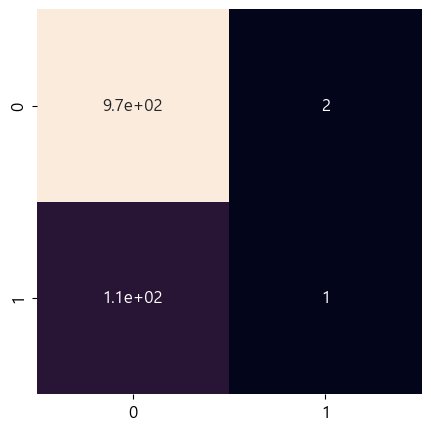

Accuracy:0.8994
Precision:0.3333
recall:0.0093
F1:0.0180
roc_auc:0.5036


In [126]:
x_tr, x_val, y_tr, y_val = train_test_split(new_df[x_col], new_df['y_train'], test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,  cbar=False, square=True)
# cbar를 통해 colorbar의 유무를 정해 줄 수 있고
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin = 200, vmax=500
plt.show()
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

In [128]:
y_tr = pd.DataFrame(y_tr,columns=['y_train'])
x_tr['y_train']= y_tr['y_train']

model = logit('y_train ~ x_tr[x_col]',data=x_tr)
fit = model.fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.269759
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_train   No. Observations:                 4331
Model:                          Logit   Df Residuals:                     4319
Method:                           MLE   Df Model:                           11
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                  0.1358
Time:                        10:37:24   Log-Likelihood:                -1168.3
converged:                       True   LL-Null:                       -1352.0
Covariance Type:            nonrobust   LLR p-value:                 5.337e-72
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.1258      0.708      4.418      0.000       1.739       4.513
x_tr[x_col][0]     -0.4637      0.074     -6.254      0.000      -0.609      -0.318
x_tr[x_col][1]      0.6291      0.120      5.236      0.000       0.394       0.865
x_tr[x_col][2]     -0.7346      0.312     -2.357      0.018      -1.346      -0.124
x_tr[x_col][3]     -1.4989      0.319     -4.701      0.000      -2.124      -0.874
x_tr[x_col][4]     -2.0898      0.322     -6.487      0.000      -2.721      -1.458
x_tr[x_col][5]     -2.0211      0.382     -5.291      0.000      -2.770      -1.272
x_tr[x_col][6]     -0.2810      0.185     -1.516      0.130      -0.644       0.082
x_tr[x_col][7]      0.4568      0.117      3.912      0.000       0.228       0.686
x_tr[x_col][8]     -0.3894      0.194     -2.006      0.045      -0.770      -0.009
x_tr[x_col][9]     -0.2286      0.188     -1.219      0.223      -0.596       0.139
x_tr[x_col][10]    -0.1268      0.167     -0.760      0.448      -0.454       0.200
===================================================================================
"""

In [121]:
x_col

Index(['income', 'gen_2', 'health_state_2', 'health_state_3', 'health_state_4',
       'health_state_5', 'disabled_2', 'work_state_2', 'age_range_3',
       'age_range_4', 'age_range_5'],
      dtype='object')

In [129]:
# new_df[x_col][6]  = 'disabled_2'

# new_df[x_col][9]  = 'age_range_4'

# new_df[x_col][10] = 'age_range_5'

new_df = new_df.drop(['disabled_2','age_range_4','age_range_5'],axis=1)

In [130]:

new_df.head()

,income,gen_2,health_state_2,health_state_3,health_state_4,health_state_5,work_state_2,age_range_3,y_train
0,6.006353,1,1,0,0,0,1,0,0
2,7.742836,0,0,0,1,0,0,0,0
8,7.737093,1,1,0,0,0,0,0,0
9,7.737093,1,1,0,0,0,1,0,0
13,8.692658,0,0,0,1,0,0,1,0


In [131]:
x_col = new_df.columns
x_col = x_col[:-1]
x_col

Index(['income', 'gen_2', 'health_state_2', 'health_state_3', 'health_state_4',
       'health_state_5', 'work_state_2', 'age_range_3'],
      dtype='object')

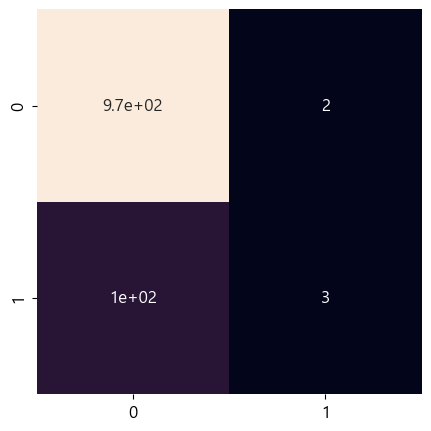

Accuracy:0.9012
Precision:0.6000
recall:0.0278
F1:0.0531
roc_auc:0.5129


In [132]:
x_tr, x_val, y_tr, y_val = train_test_split(new_df[x_col], new_df['y_train'], test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,  cbar=False, square=True)
# cbar를 통해 colorbar의 유무를 정해 줄 수 있고
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin = 200, vmax=500
plt.show()
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

In [134]:
y_tr = pd.DataFrame(y_tr,columns=['y_train'])
x_tr['y_train']= y_tr['y_train']

model = logit('y_train ~ x_tr[x_col]',data=x_tr)
fit = model.fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.270168
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_train   No. Observations:                 4331
Model:                          Logit   Df Residuals:                     4322
Method:                           MLE   Df Model:                            8
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                  0.1345
Time:                        10:46:33   Log-Likelihood:                -1170.1
converged:                       True   LL-Null:                       -1352.0
Covariance Type:            nonrobust   LLR p-value:                 1.061e-73
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.7845      0.647      4.303      0.000       1.516       4.053
x_tr[x_col][0]    -0.4650      0.073     -6.408      0.000      -0.607      -0.323
x_tr[x_col][1]     0.6093      0.119      5.107      0.000       0.375       0.843
x_tr[x_col][2]    -0.7387      0.311     -2.376      0.018      -1.348      -0.129
x_tr[x_col][3]    -1.5298      0.317     -4.825      0.000      -2.151      -0.908
x_tr[x_col][4]    -2.1077      0.315     -6.690      0.000      -2.725      -1.490
x_tr[x_col][5]    -2.0091      0.370     -5.435      0.000      -2.734      -1.285
x_tr[x_col][6]     0.4874      0.116      4.219      0.000       0.261       0.714
x_tr[x_col][7]    -0.2849      0.169     -1.687      0.092      -0.616       0.046
==================================================================================
"""

In [135]:
x_col

Index(['income', 'gen_2', 'health_state_2', 'health_state_3', 'health_state_4',
       'health_state_5', 'work_state_2', 'age_range_3'],
      dtype='object')

In [136]:
# new_df[x_col][7] = 'age_range_3'

new_df = new_df.drop(['age_range_3'],axis=1)


In [137]:
x_col = new_df.columns
x_col = x_col[:-1]
x_col

Index(['income', 'gen_2', 'health_state_2', 'health_state_3', 'health_state_4',
       'health_state_5', 'work_state_2'],
      dtype='object')

In [142]:
x_tr, x_val, y_tr, y_val = train_test_split(new_df[x_col], new_df['y_train'], test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# # conFusion Matrix
# from sklearn.metrics import confusion_matrix
# sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,  cbar=False, square=True)
# cbar를 통해 colorbar의 유무를 정해 줄 수 있고
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin = 200, vmax=500
plt.show()
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

Accuracy:0.9012
Precision:0.6000
recall:0.0278
F1:0.0531
roc_auc:0.5129


In [143]:
# conFusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, y_val_pred))

[[973   2]
 [105   3]]


In [139]:
y_tr = pd.DataFrame(y_tr,columns=['y_train'])
x_tr['y_train']= y_tr['y_train']

model = logit('y_train ~ x_tr[x_col]',data=x_tr)
fit = model.fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.270513
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_train   No. Observations:                 4331
Model:                          Logit   Df Residuals:                     4323
Method:                           MLE   Df Model:                            7
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                  0.1334
Time:                        10:56:36   Log-Likelihood:                -1171.6
converged:                       True   LL-Null:                       -1352.0
Covariance Type:            nonrobust   LLR p-value:                 6.177e-74
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.8788      0.647      4.451      0.000       1.611       4.146
x_tr[x_col][0]    -0.4786      0.072     -6.607      0.000      -0.621      -0.337
x_tr[x_col][1]     0.6078      0.119      5.091      0.000       0.374       0.842
x_tr[x_col][2]    -0.7474      0.311     -2.404      0.016      -1.357      -0.138
x_tr[x_col][3]    -1.5492      0.317     -4.888      0.000      -2.170      -0.928
x_tr[x_col][4]    -2.1512      0.314     -6.845      0.000      -2.767      -1.535
x_tr[x_col][5]    -2.0662      0.368     -5.608      0.000      -2.788      -1.344
x_tr[x_col][6]     0.4983      0.116      4.313      0.000       0.272       0.725
==================================================================================
"""

In [144]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,x_tr[x_col][0],1.193768
1,x_tr[x_col][1],1.044251
2,x_tr[x_col][2],9.871108
3,x_tr[x_col][3],13.933720
4,x_tr[x_col][4],21.878965
5,x_tr[x_col][5],9.117407
6,x_tr[x_col][6],1.114986


In [145]:
x_col

Index(['income', 'gen_2', 'health_state_2', 'health_state_3', 'health_state_4',
       'health_state_5', 'work_state_2'],
      dtype='object')

In [146]:
# new_df[x_col][2] =  'health_state_2'

# new_df[x_col][3] =  'health_state_3'

# new_df[x_col][4] =  'health_state_4'

new_df = new_df.drop(['health_state_2','health_state_3','health_state_4'],axis=1)
new_df.head()

,income,gen_2,health_state_5,work_state_2,y_train
0,6.006353,1,0,1,0
2,7.742836,0,0,0,0
8,7.737093,1,0,0,0
9,7.737093,1,0,1,0
13,8.692658,0,0,0,0


In [147]:
x_col = new_df.columns
x_col = x_col[:-1]
x_col

Index(['income', 'gen_2', 'health_state_5', 'work_state_2'], dtype='object')

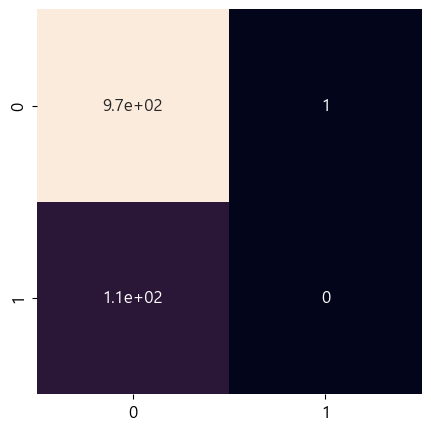

Accuracy:0.8994
Precision:0.0000
recall:0.0000
F1:0.0000
roc_auc:0.4995


In [148]:
x_tr, x_val, y_tr, y_val = train_test_split(new_df[x_col], new_df['y_train'], test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,  cbar=False, square=True)
# cbar를 통해 colorbar의 유무를 정해 줄 수 있고
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin = 200, vmax=500
plt.show()
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

In [149]:
y_tr = pd.DataFrame(y_tr,columns=['y_train'])
x_tr['y_train']= y_tr['y_train']

model = logit('y_train ~ x_tr[x_col]',data=x_tr)
fit = model.fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.283309
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_train   No. Observations:                 4331
Model:                          Logit   Df Residuals:                     4326
Method:                           MLE   Df Model:                            4
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                 0.09242
Time:                        11:22:21   Log-Likelihood:                -1227.0
converged:                       True   LL-Null:                       -1352.0
Covariance Type:            nonrobust   LLR p-value:                 6.833e-53
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.2997      0.583      5.660      0.000       2.157       4.442
x_tr[x_col][0]    -0.7339      0.069    -10.683      0.000      -0.869      -0.599
x_tr[x_col][1]     0.6301      0.118      5.360      0.000       0.400       0.861
x_tr[x_col][2]    -0.3720      0.221     -1.681      0.093      -0.806       0.062
x_tr[x_col][3]     0.6835      0.111      6.135      0.000       0.465       0.902
==================================================================================
"""

In [143]:
x_col

Index(['income', 'gen_2', 'health_state_5', 'disabled_2', 'work_state_2'], dtype='object')

In [144]:
# new_df[x_col][2] = 'health_state_5'

new_df = new_df.drop(['health_state_5'],axis=1)


,income,gen_2,disabled_2,work_state_2,y_train
0,6.006353,1,1,1,0
2,7.742836,0,1,0,0
8,7.737093,1,1,0,0
9,7.737093,1,1,1,0
13,8.692658,0,1,0,0


In [150]:
x_col = new_df.columns
x_col = x_col[:-1]
x_col

Index(['income', 'gen_2', 'health_state_5', 'work_state_2'], dtype='object')

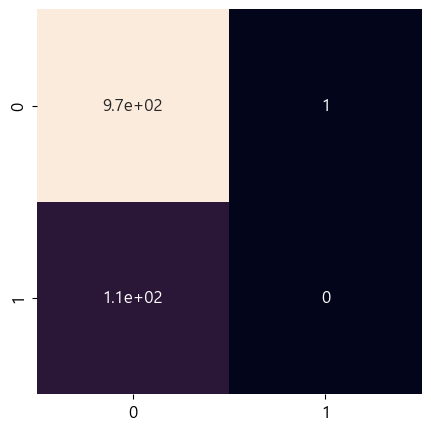

Accuracy:0.8994
Precision:0.0000
recall:0.0000
F1:0.0000
roc_auc:0.4995


In [151]:
x_tr, x_val, y_tr, y_val = train_test_split(new_df[x_col], new_df['y_train'], test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,  cbar=False, square=True)
# cbar를 통해 colorbar의 유무를 정해 줄 수 있고
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin = 200, vmax=500
plt.show()
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

In [154]:
confusion_matrix(y_val, y_val_pred)

array([[974,   1],
       [108,   0]], dtype=int64)

In [153]:
y_tr = pd.DataFrame(y_tr,columns=['y_train'])
x_tr['y_train']= y_tr['y_train']

model = logit('y_train ~ x_tr[x_col]',data=x_tr)
fit = model.fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.283309
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_train   No. Observations:                 4331
Model:                          Logit   Df Residuals:                     4326
Method:                           MLE   Df Model:                            4
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                 0.09242
Time:                        11:28:24   Log-Likelihood:                -1227.0
converged:                       True   LL-Null:                       -1352.0
Covariance Type:            nonrobust   LLR p-value:                 6.833e-53
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.2997      0.583      5.660      0.000       2.157       4.442
x_tr[x_col][0]    -0.7339      0.069    -10.683      0.000      -0.869      -0.599
x_tr[x_col][1]     0.6301      0.118      5.360      0.000       0.400       0.861
x_tr[x_col][2]    -0.3720      0.221     -1.681      0.093      -0.806       0.062
x_tr[x_col][3]     0.6835      0.111      6.135      0.000       0.465       0.902
==================================================================================
"""

In [150]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,x_tr[x_col][0],1.072847
1,x_tr[x_col][1],1.049409
2,x_tr[x_col][2],1.039869
3,x_tr[x_col][3],1.098321


In [152]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=20)
from sklearn.model_selection import cross_val_score

auc_scores = cross_val_score(lr_model, x_tr, x_tr['y_train'], cv=5, scoring='roc_auc')
print("개별 Fold의 AUC 점수 :", np.round(auc_scores, 4))
print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))

개별 Fold의 AUC 점수 : [1. 1. 1. 1. 1.]
평균 AUC 점수: 1.0


In [153]:
def plot_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    feature_names = [features[i] for i in indices]
    feature_imp = importances[indices]

    plt.figure(figsize=(10,12))
    plt.title("Feature impotance")
    plt.barh(range(len(indices)), feature_imp, align='center')
    plt.yticks(range(len(indices)), feature_names)
    plt.xlabel("Relative Importance")

    print("피처:", list(reversed(feature_names)))
    print("중요도:", list(reversed(feature_imp)))

    return list(reversed(feature_names)), list(reversed(feature_imp))

In [160]:
rf_model.fit(x_tr.iloc[:,:-1], x_tr['y_train'])

RandomForestClassifier(random_state=20)

In [161]:
selected_features = list(x_tr.columns)


In [162]:
selected_features = selected_features[:-1]

피처: ['income', 'work_state_2', 'gen_2', 'disabled_2']
중요도: [0.9484380711750253, 0.02267717800871048, 0.015050679906019156, 0.013834070910245059]


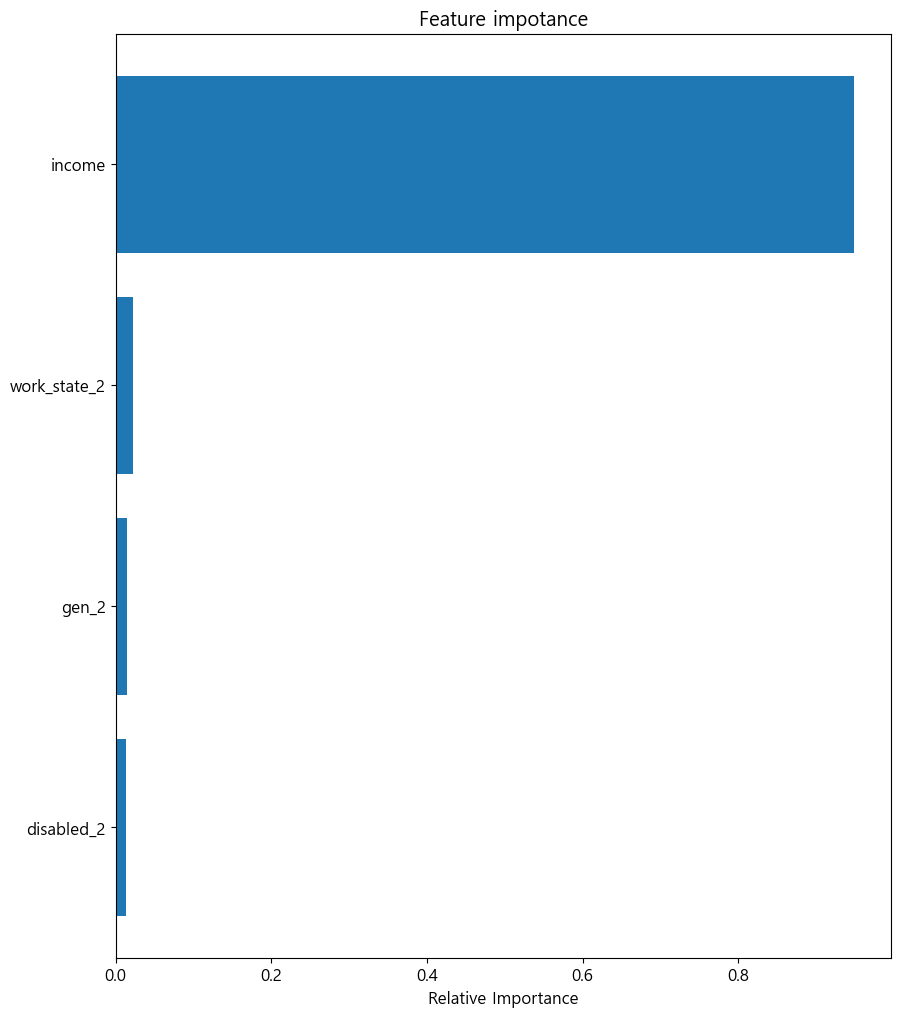

In [163]:
imp_features, imp_scores = plot_importance(rf_model, selected_features)